In [71]:
import numpy as np
import matplotlib.pyplot as plt


Nuremberg app. dimensions: 20km (vertical) x 15km (horizontal) 

In [72]:
n_x  = 15*5  #number of vertical lines in [0, 0.75] interval
n_y = 20*5 #number of horizontal lines in [0,1] interval
            #  this gives 200m distance between points

Generate customers randomly, with a normal-distributed profit per customer

In [73]:
n_customers = 40

import random
random.seed(3002) ## **Pablo** Set the seed to generate the same random customers on each run. 

def samplegrid(w, h, n):
    a = [divmod(i, (h-1)) for i in random.sample(range((w-1) * (h-1)), n)]
    anewtuple = []
    for atuple in a:
        anewtuple.append([atuple[0]/(w-1)*0.75, atuple[1]/(h-1)])
        
    anewtuple = np.array(anewtuple)
    return anewtuple.T[0], anewtuple.T[1]

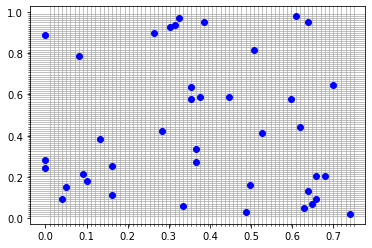

In [74]:
x_customers, y_customers = samplegrid(n_x, n_y, n_customers)
fig = plt.axes()
#longitudes = coordinates.T[0]
#latitudes = coordinates.T[1]
#latitudes = (latitudes-np.min(latitudes))/(np.max(latitudes)-np.min(latitudes))
#longitudes = (longitudes-np.min(longitudes))/(np.max(latitudes)-np.min(latitudes))
major_ticks_top=np.linspace(0,0.75,n_x)
fig.set_xticks (major_ticks_top, minor = True)
major_ticks_top=np.linspace(0, 1, n_y)
fig.set_yticks(major_ticks_top, minor = True)
fig.grid(which = 'minor')
fig.plot(x_customers, y_customers, 'bo')

(almost) normally generated profits per customer - mean 10 000, std 5000:

In [75]:
profits = np.random.normal(10000, 5000, n_customers)
profits = np.abs(profits)
profits

array([13392.5633213 , 14600.44364233, 10619.86982244,  4458.80470405,
       15936.70184587, 10510.34340925,  7315.69930572,  8733.91806805,
        9657.47591826,  5073.84094931,  5898.3046571 ,  9832.58886091,
       10507.86548385,  7596.01576468,  6842.94487949, 12405.0361247 ,
        8944.63468529, 10954.11156936, 15794.1006029 ,  9990.44763199,
        6156.44650371,  5997.08387302,  8382.94541743,  5900.16523769,
       15696.18211915,  5459.97824735,  6380.73306639, 13556.2396464 ,
        7270.6620943 ,  1247.26084904,  3979.78352641, 15412.45354788,
        7619.0530831 , 13974.9183905 ,  2123.10645127, 13619.2565441 ,
        7100.41799636,  9123.59228169, 12425.44293335, 12030.88729338])

In [76]:
number_ATMs = np.arange(start = 5, stop = 21)
number_ATMs

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30])

# your solution

In [32]:
longitudes = [[]] # our results for different ATM numbers, x-variables normalized [0~0.75]
latitudes = [[]] # -||- ,  y-variables normalized [0~1]

# create network and calculate metric
first show the network and metric for one given atm number = 20

In [33]:
def EuclideanDistance(x,y): 
    
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def assign_nearest(x_customer, y_customer, x_atm, y_atm):
    data_customer = []
    data_atm = []
    for i in range(len(x_customer)):
        data_customer.append([x_customer[i],y_customer[i]])
    for i in range(len(x_atm)):
        data_atm.append([x_atm[i],y_atm[i]])
    
    network = []
    length = []
    for customer in data_customer:
        allatms = []
        for atm in data_atm:
            allatms.append(EuclideanDistance((customer[0], customer[1]), (atm[0], atm[1])))
        nearest = np.argmin(allatms)
        length.append(np.min(allatms))
        network.append(nearest)
    return network, np.sum(length), length

In [66]:
network, lengths = assign_nearest(x_customers, y_customers, longitudes[10], latitudes[10])

ValueError: attempt to get argmin of an empty sequence

In [ ]:
%matplotlib inline
fig = plt.axes()
major_ticks_top=np.linspace(0,0.75,n_x)
fig.set_xticks (major_ticks_top, minor = True)
major_ticks_top=np.linspace(0, 1, n_y)
fig.set_yticks(major_ticks_top, minor = True)
fig.grid(which = 'minor')
fig.plot(longitudes[10], latitudes[10], 'ro')
fig.plot(x_customers, y_customers, 'bo')
for j in range(len(network)):
    fig.plot([x_customers[j], longitudes[10][network[j]]],[y_customers[j],latitudes[10][network[j]]], 'g')

In [30]:
def Metric(distances, profits, alpha = 1):
    summ = np.sum(distances**(1-alpha)*profits**alpha)
    return summ

In [43]:
Metric (lengths, profits)

NameError: name 'length' is not defined

Now plot Metrics for different ATM numbers

In [65]:
def compare_ATM_numbers(x_customers, y_customers, longitudes, latitudes, number_ATMs):
    metrics = []
    for ATM_number  in range(number_ATMs):
        network, lengths = assign_nearest(x_customers, y_customers, longitudes[ATM_number], latitudes[ATM_number])
        metric = Metric(lengths, profits)
        metrics.append(metric)
    return metrics

In [ ]:
metrics  =compare_ATM_numbers(x_customers, y_customers, longitudes, latitudes, number_ATMs)

In [ ]:
fig2 = plt.axes()
fig2.plot(number_ATMs, metrics)